# E-Ticaret Satış Analizi - Detaylı Analiz ve Sonuçlar

Bu notebook'ta e-ticaret verilerini detaylı analiz edip gerçek sonuçları göreceğiz.

In [1]:
# Gerekli kütüphaneleri import edelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Türkçe karakter desteği
plt.rcParams['font.family'] = ['DejaVu Sans']
plt.style.use('seaborn-v0_8')

print("Kütüphaneler başarıyla import edildi!")

Kütüphaneler başarıyla import edildi!


In [2]:
# Veri setini yükle
df = pd.read_csv('../data/raw/ecommerce_sales.csv')
print("Veri seti yüklendi!")
print(f"Satır sayısı: {len(df)}")
print(f"Sütun sayısı: {len(df.columns)}")
print(f"Toplam satış: {df['total_amount'].sum():,.2f} TL")
df.head()

Veri seti yüklendi!
Satır sayısı: 1000
Sütun sayısı: 15
Toplam satış: 20,775,412.78 TL


,order_id,customer_id,product_id,product_name,category,order_date,quantity,unit_price,total_amount,payment_method,customer_city,customer_age,customer_gender,is_returned,rating
0,1,120,83,Koşu Bandı,Spor,2023-08-03,5,958.00,4790.01,Kapıda Ödeme,İzmir,41,Erkek,0,3
1,2,291,60,Roman,Kitap,2023-10-04,2,366.56,733.12,Kredi Kartı,Bursa,39,Erkek,0,1
2,3,799,80,Kahve Makinesi,Ev & Yaşam,2023-09-28,4,4058.62,16234.49,Havale,Adana,64,Kadın,0,4
3,4,940,39,Samsung Galaxy,Elektronik,2023-10-01,5,43067.05,215335.25,Kredi Kartı,Bursa,31,Kadın,0,2
4,5,554,44,Roman,Kitap,2023-09-21,4,348.43,1393.73,Kapıda Ödeme,İzmir,31,Erkek,0,4


Kategori Bazında Detaylı Analiz:
            Toplam_Satis  Ortalama_Satis  Siparis_Sayisi  Toplam_Adet  \
category                                                                
Elektronik   15907434.50        81160.38             196          609   
Ev & Yaşam    2619196.10        14797.72             177          503   
Spor          1465689.08         7594.24             193          544   
Giyim          623379.70         2912.99             214          614   
Kitap          159713.40          725.97             220          653   

            Ortalama_Degerlendirme  
category                            
Elektronik                    2.96  
Ev & Yaşam                    3.22  
Spor                          3.09  
Giyim                         2.92  
Kitap                         3.00  


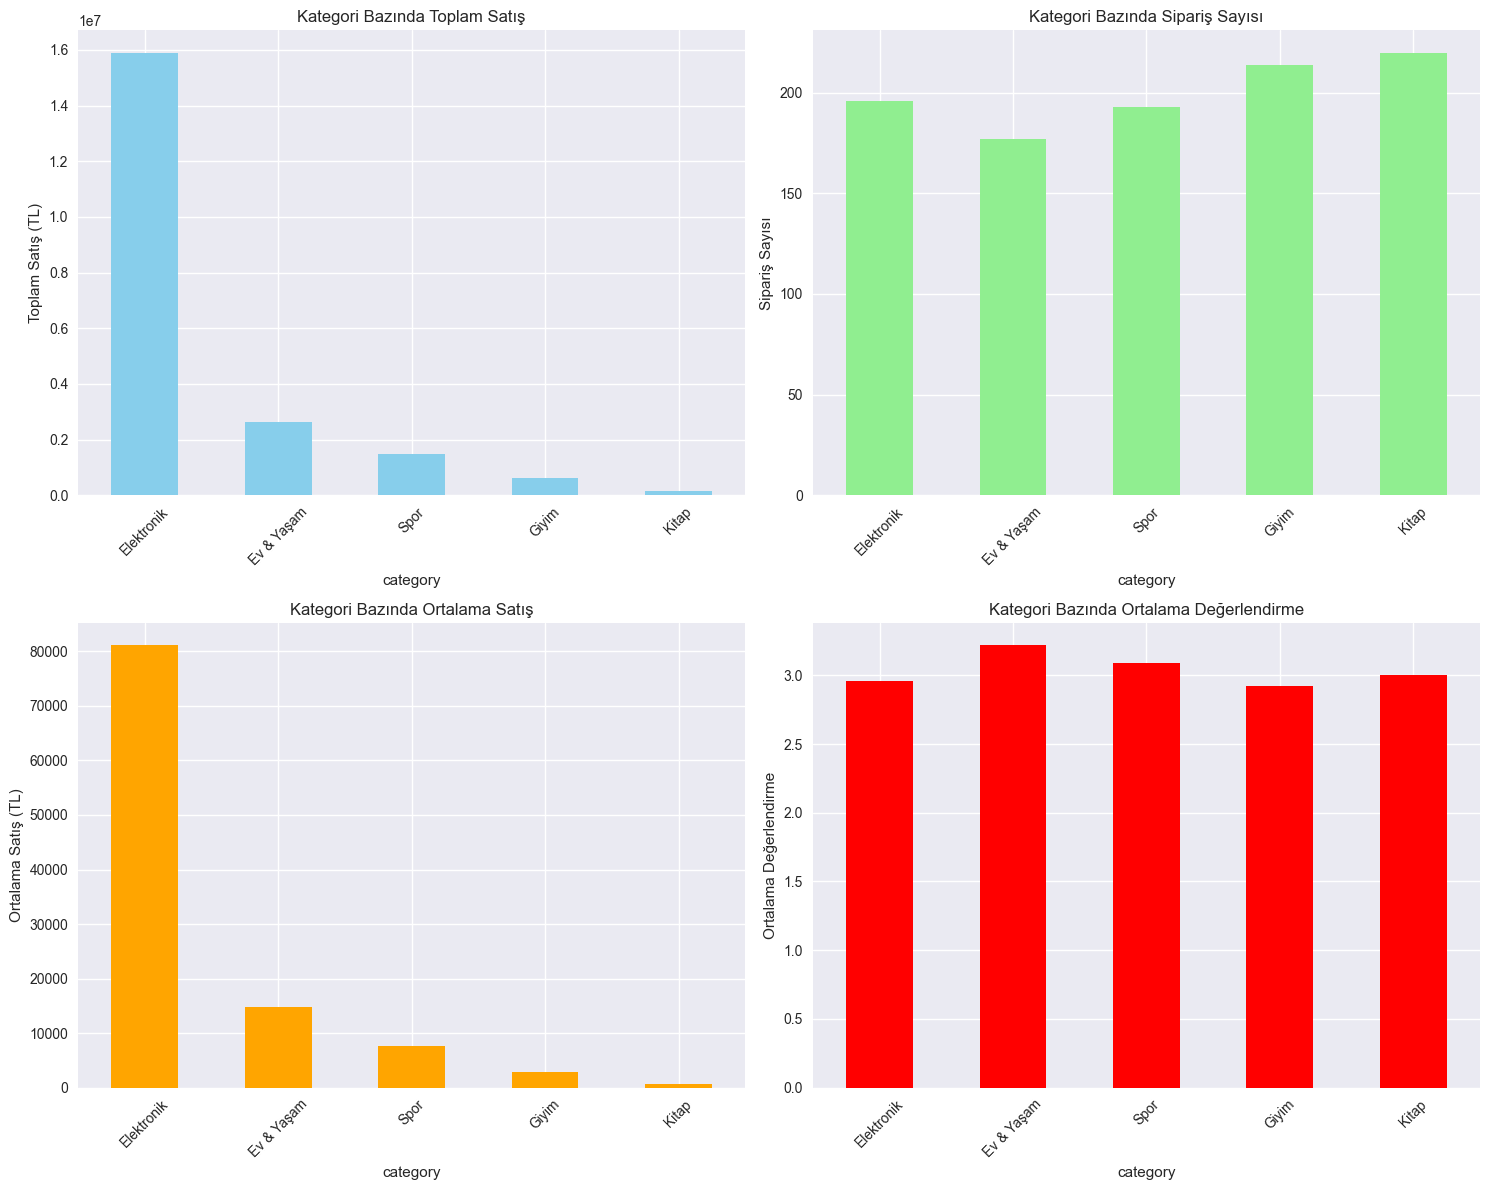

In [3]:
# Kategori bazında detaylı analiz
category_analysis = df.groupby('category').agg({
    'total_amount': ['sum', 'mean', 'count'],
    'quantity': 'sum',
    'rating': 'mean'
}).round(2)

category_analysis.columns = ['Toplam_Satis', 'Ortalama_Satis', 'Siparis_Sayisi', 'Toplam_Adet', 'Ortalama_Degerlendirme']
category_analysis = category_analysis.sort_values('Toplam_Satis', ascending=False)

print("Kategori Bazında Detaylı Analiz:")
print(category_analysis)

# Görselleştirme
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Toplam satış
category_analysis['Toplam_Satis'].plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Kategori Bazında Toplam Satış')
axes[0,0].set_ylabel('Toplam Satış (TL)')
axes[0,0].tick_params(axis='x', rotation=45)

# Sipariş sayısı
category_analysis['Siparis_Sayisi'].plot(kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Kategori Bazında Sipariş Sayısı')
axes[0,1].set_ylabel('Sipariş Sayısı')
axes[0,1].tick_params(axis='x', rotation=45)

# Ortalama satış
category_analysis['Ortalama_Satis'].plot(kind='bar', ax=axes[1,0], color='orange')
axes[1,0].set_title('Kategori Bazında Ortalama Satış')
axes[1,0].set_ylabel('Ortalama Satış (TL)')
axes[1,0].tick_params(axis='x', rotation=45)

# Ortalama değerlendirme
category_analysis['Ortalama_Degerlendirme'].plot(kind='bar', ax=axes[1,1], color='red')
axes[1,1].set_title('Kategori Bazında Ortalama Değerlendirme')
axes[1,1].set_ylabel('Ortalama Değerlendirme')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Şehir Bazında Detaylı Analiz:
               Toplam_Satis  Ortalama_Satis  Siparis_Sayisi  Ortalama_Yas  \
customer_city                                                               
İzmir            3233511.89        25868.10             125         40.90   
Bursa            3186765.56        22285.07             143         42.17   
İstanbul         2966077.65        25791.98             115         45.75   
Gaziantep        2839826.73        19721.02             144         42.22   
Konya            2732533.87        21182.43             129         43.25   
Adana            2191758.36        17675.47             124         42.83   
Antalya          1920206.84        17299.16             111         45.28   
Ankara           1704731.88        15639.74             109         45.36   

               Ortalama_Degerlendirme  
customer_city                          
İzmir                            3.15  
Bursa                            2.99  
İstanbul                         2.96  

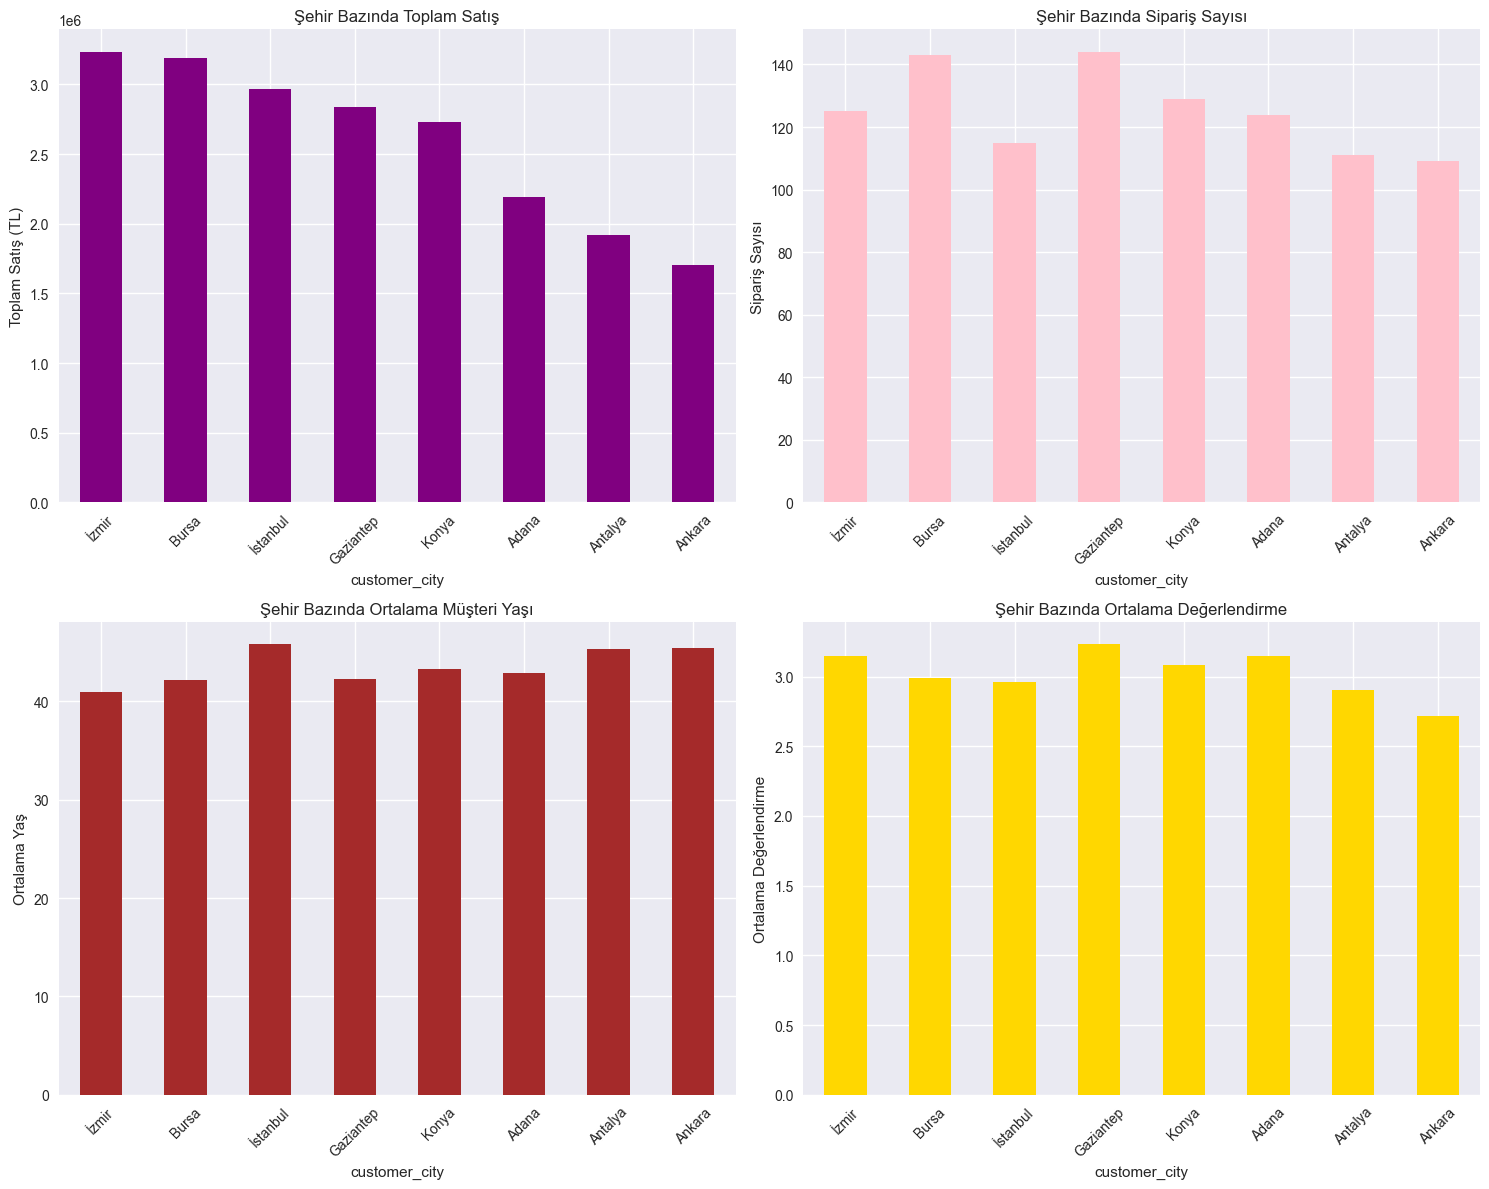

In [4]:
# Şehir bazında detaylı analiz
city_analysis = df.groupby('customer_city').agg({
    'total_amount': ['sum', 'mean', 'count'],
    'customer_age': 'mean',
    'rating': 'mean'
}).round(2)

city_analysis.columns = ['Toplam_Satis', 'Ortalama_Satis', 'Siparis_Sayisi', 'Ortalama_Yas', 'Ortalama_Degerlendirme']
city_analysis = city_analysis.sort_values('Toplam_Satis', ascending=False)

print("Şehir Bazında Detaylı Analiz:")
print(city_analysis)

# Görselleştirme
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Toplam satış
city_analysis['Toplam_Satis'].plot(kind='bar', ax=axes[0,0], color='purple')
axes[0,0].set_title('Şehir Bazında Toplam Satış')
axes[0,0].set_ylabel('Toplam Satış (TL)')
axes[0,0].tick_params(axis='x', rotation=45)

# Sipariş sayısı
city_analysis['Siparis_Sayisi'].plot(kind='bar', ax=axes[0,1], color='pink')
axes[0,1].set_title('Şehir Bazında Sipariş Sayısı')
axes[0,1].set_ylabel('Sipariş Sayısı')
axes[0,1].tick_params(axis='x', rotation=45)

# Ortalama yaş
city_analysis['Ortalama_Yas'].plot(kind='bar', ax=axes[1,0], color='brown')
axes[1,0].set_title('Şehir Bazında Ortalama Müşteri Yaşı')
axes[1,0].set_ylabel('Ortalama Yaş')
axes[1,0].tick_params(axis='x', rotation=45)

# Ortalama değerlendirme
city_analysis['Ortalama_Degerlendirme'].plot(kind='bar', ax=axes[1,1], color='gold')
axes[1,1].set_title('Şehir Bazında Ortalama Değerlendirme')
axes[1,1].set_ylabel('Ortalama Değerlendirme')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Ödeme Yöntemi Bazında Detaylı Analiz:
                Toplam_Satis  Ortalama_Satis  Siparis_Sayisi  \
payment_method                                                 
Kredi Kartı       7237473.96        21998.40             329   
Kapıda Ödeme      7032816.18        21773.42             323   
Havale            6505122.64        18692.88             348   

                Ortalama_Degerlendirme  
payment_method                          
Kredi Kartı                       3.15  
Kapıda Ödeme                      2.98  
Havale                            2.97  


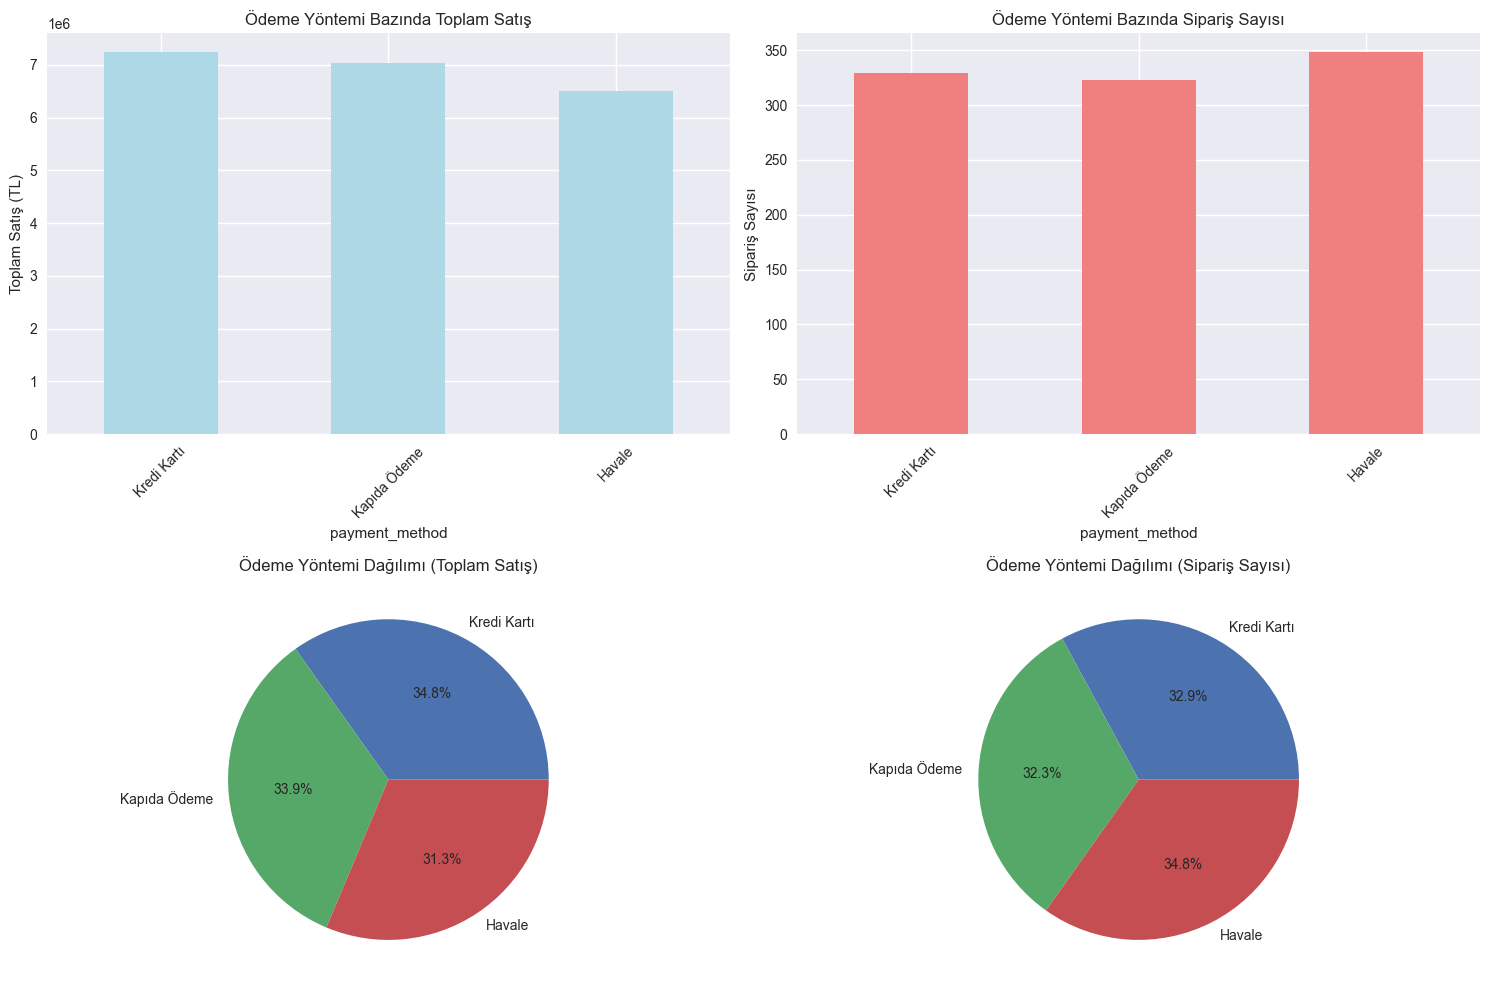

In [5]:
# Ödeme yöntemi analizi
payment_analysis = df.groupby('payment_method').agg({
    'total_amount': ['sum', 'mean', 'count'],
    'rating': 'mean'
}).round(2)

payment_analysis.columns = ['Toplam_Satis', 'Ortalama_Satis', 'Siparis_Sayisi', 'Ortalama_Degerlendirme']
payment_analysis = payment_analysis.sort_values('Toplam_Satis', ascending=False)

print("Ödeme Yöntemi Bazında Detaylı Analiz:")
print(payment_analysis)

# Görselleştirme
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Toplam satış
payment_analysis['Toplam_Satis'].plot(kind='bar', ax=axes[0,0], color='lightblue')
axes[0,0].set_title('Ödeme Yöntemi Bazında Toplam Satış')
axes[0,0].set_ylabel('Toplam Satış (TL)')
axes[0,0].tick_params(axis='x', rotation=45)

# Sipariş sayısı
payment_analysis['Siparis_Sayisi'].plot(kind='bar', ax=axes[0,1], color='lightcoral')
axes[0,1].set_title('Ödeme Yöntemi Bazında Sipariş Sayısı')
axes[0,1].set_ylabel('Sipariş Sayısı')
axes[0,1].tick_params(axis='x', rotation=45)

# Pasta grafik - Toplam satış
axes[1,0].pie(payment_analysis['Toplam_Satis'], labels=payment_analysis.index, autopct='%1.1f%%')
axes[1,0].set_title('Ödeme Yöntemi Dağılımı (Toplam Satış)')

# Pasta grafik - Sipariş sayısı
axes[1,1].pie(payment_analysis['Siparis_Sayisi'], labels=payment_analysis.index, autopct='%1.1f%%')
axes[1,1].set_title('Ödeme Yöntemi Dağılımı (Sipariş Sayısı)')

plt.tight_layout()
plt.show()

Müşteri Yaş Analizi:
Ortalama müşteri yaşı: 43.3
En genç müşteri: 18
En yaşlı müşteri: 69
Yaş standart sapması: 15.1

Yaş Grubu Bazında Analiz:
           Toplam_Satis  Ortalama_Satis  Siparis_Sayisi  \
yas_grubu                                                 
18-25        2488854.83        15175.94             164   
26-35        4025680.08        21413.19             188   
36-45        4780813.01        25842.23             185   
46-55        3823445.68        19708.48             194   
55+          5656619.18        21028.32             269   

           Ortalama_Degerlendirme  
yas_grubu                          
18-25                        3.04  
26-35                        3.03  
36-45                        2.99  
46-55                        2.96  
55+                          3.10  


C:\Users\mrcdp\AppData\Local\Temp\ipykernel_22572\649467863.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_analysis = df.groupby('yas_grubu').agg({


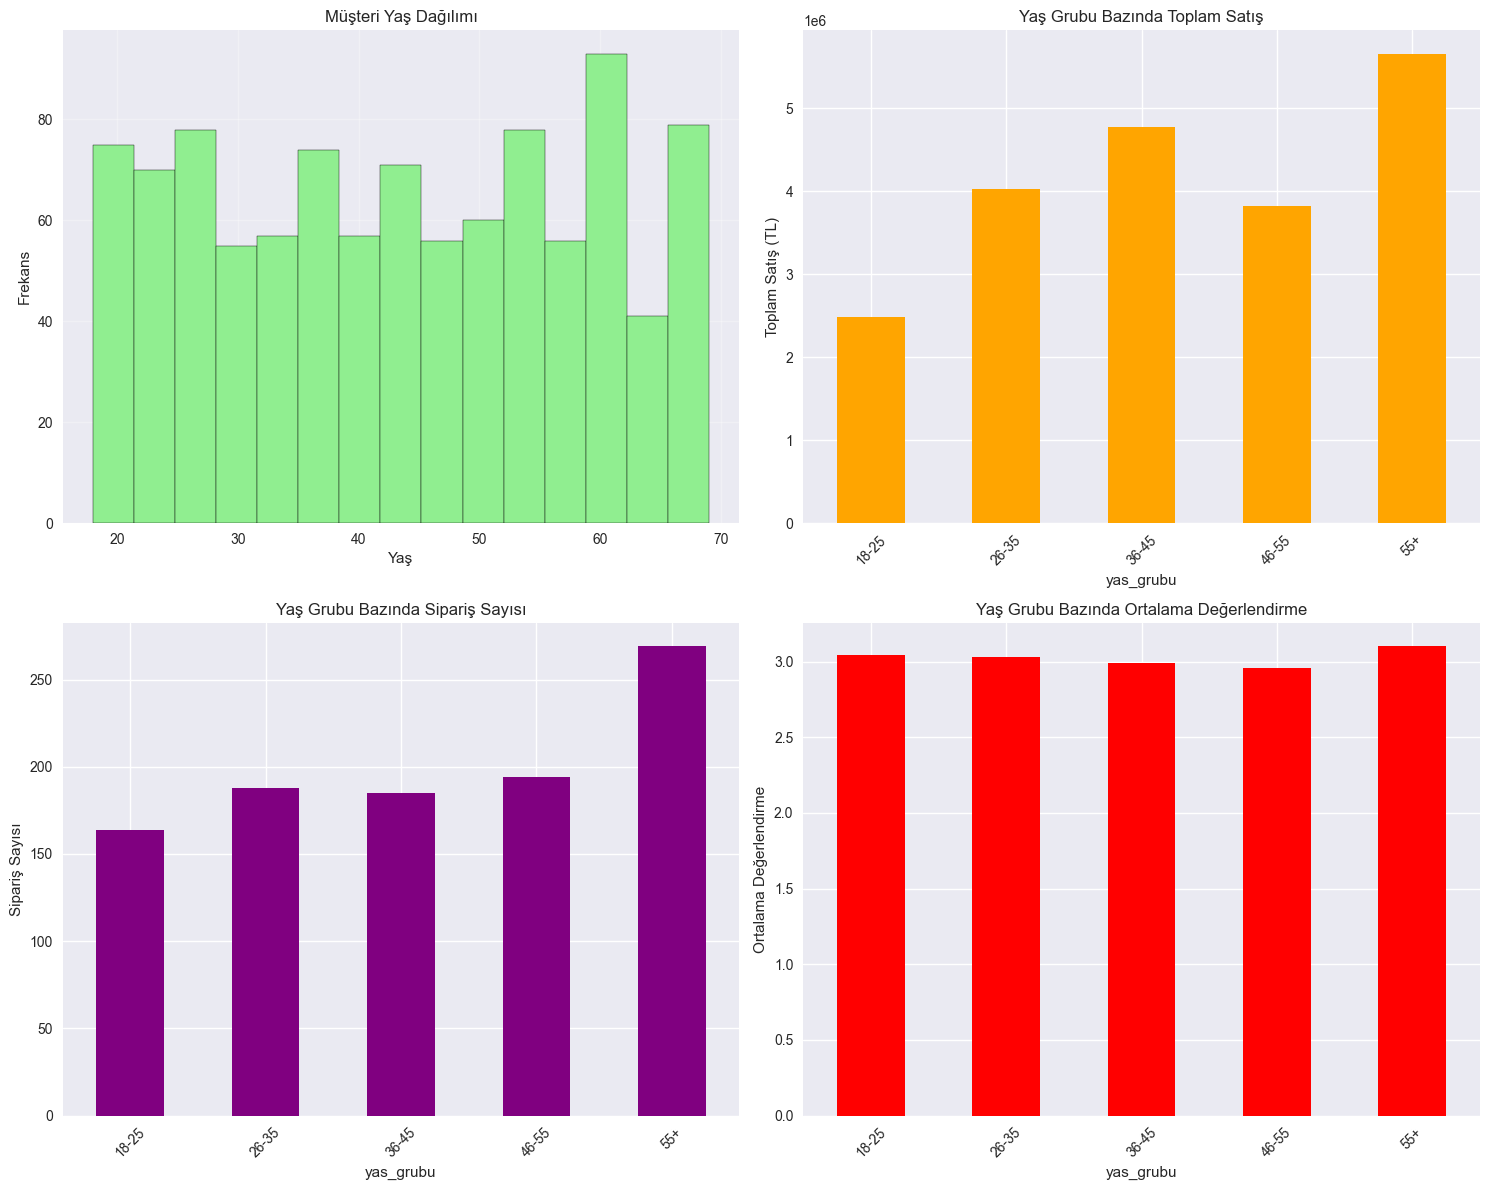

In [6]:
# Müşteri segmentasyonu
print("Müşteri Yaş Analizi:")
print(f"Ortalama müşteri yaşı: {df['customer_age'].mean():.1f}")
print(f"En genç müşteri: {df['customer_age'].min()}")
print(f"En yaşlı müşteri: {df['customer_age'].max()}")
print(f"Yaş standart sapması: {df['customer_age'].std():.1f}")

# Yaş grupları oluştur
df['yas_grubu'] = pd.cut(df['customer_age'], 
                         bins=[0, 25, 35, 45, 55, 100], 
                         labels=['18-25', '26-35', '36-45', '46-55', '55+'])

age_group_analysis = df.groupby('yas_grubu').agg({
    'total_amount': ['sum', 'mean', 'count'],
    'rating': 'mean'
}).round(2)

age_group_analysis.columns = ['Toplam_Satis', 'Ortalama_Satis', 'Siparis_Sayisi', 'Ortalama_Degerlendirme']

print("\nYaş Grubu Bazında Analiz:")
print(age_group_analysis)

# Görselleştirme
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Yaş dağılımı
df['customer_age'].hist(bins=15, ax=axes[0,0], edgecolor='black', color='lightgreen')
axes[0,0].set_title('Müşteri Yaş Dağılımı')
axes[0,0].set_xlabel('Yaş')
axes[0,0].set_ylabel('Frekans')
axes[0,0].grid(True, alpha=0.3)

# Yaş grubu bazında satış
age_group_analysis['Toplam_Satis'].plot(kind='bar', ax=axes[0,1], color='orange')
axes[0,1].set_title('Yaş Grubu Bazında Toplam Satış')
axes[0,1].set_ylabel('Toplam Satış (TL)')
axes[0,1].tick_params(axis='x', rotation=45)

# Yaş grubu bazında sipariş sayısı
age_group_analysis['Siparis_Sayisi'].plot(kind='bar', ax=axes[1,0], color='purple')
axes[1,0].set_title('Yaş Grubu Bazında Sipariş Sayısı')
axes[1,0].set_ylabel('Sipariş Sayısı')
axes[1,0].tick_params(axis='x', rotation=45)

# Yaş grubu bazında ortalama değerlendirme
age_group_analysis['Ortalama_Degerlendirme'].plot(kind='bar', ax=axes[1,1], color='red')
axes[1,1].set_title('Yaş Grubu Bazında Ortalama Değerlendirme')
axes[1,1].set_ylabel('Ortalama Değerlendirme')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Cinsiyet Bazında Detaylı Analiz:
                 Toplam_Satis  Ortalama_Satis  Siparis_Sayisi  Ortalama_Yas  \
customer_gender                                                               
Erkek              9023981.90        17353.81             520         42.64   
Kadın             11751430.88        24482.15             480         44.11   

                 Ortalama_Degerlendirme  
customer_gender                          
Erkek                              3.07  
Kadın                              2.99  


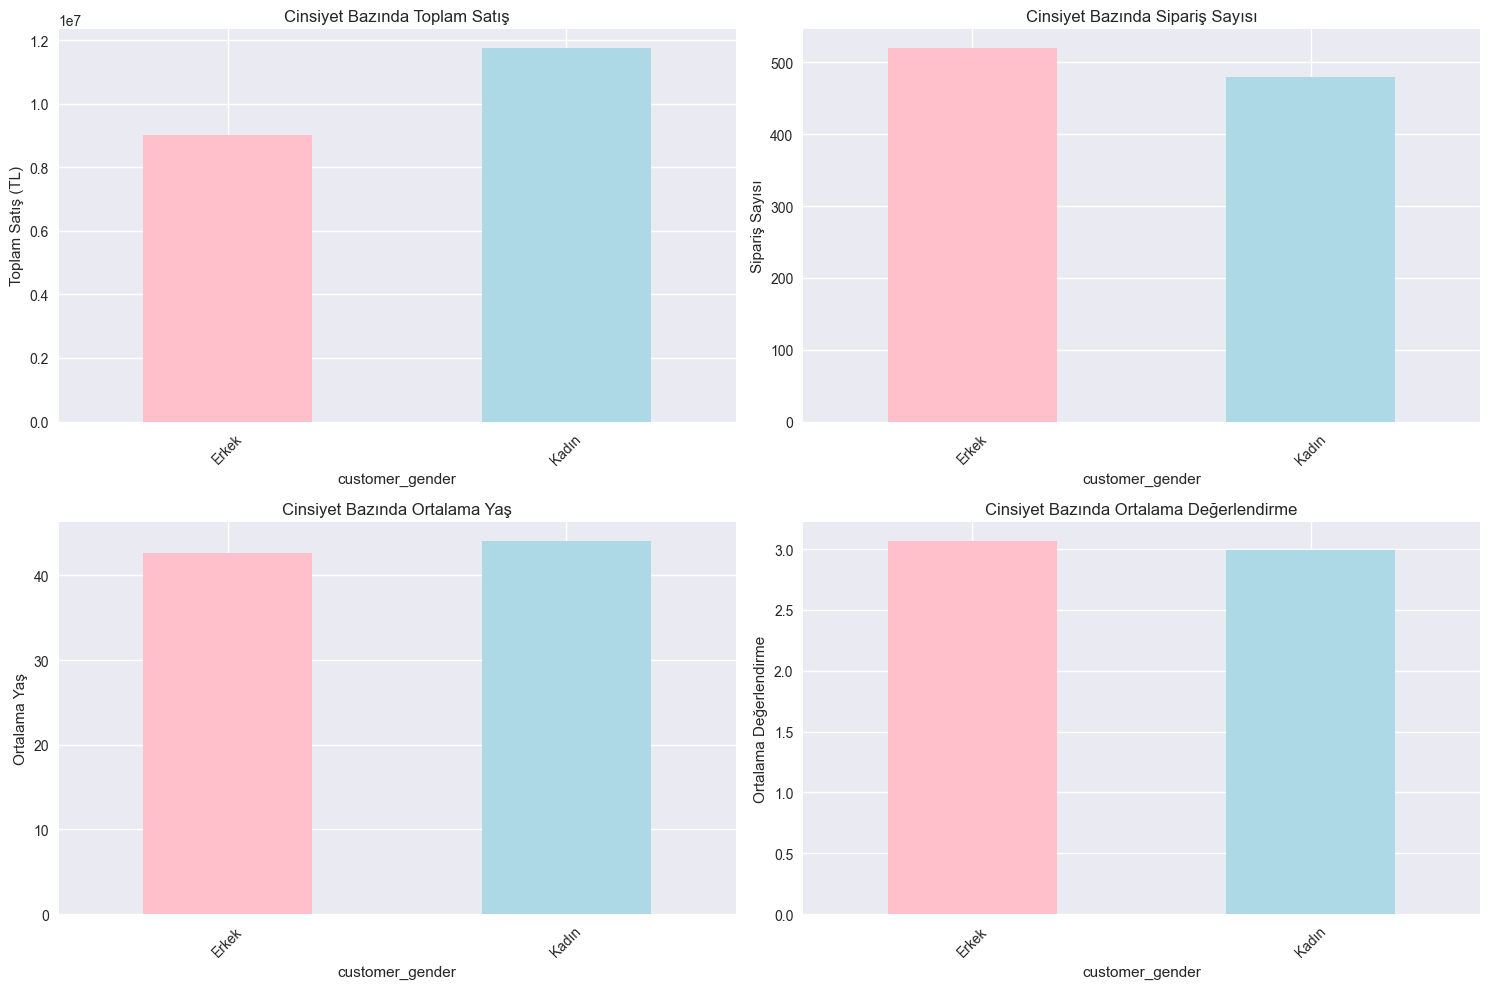

In [7]:
# Cinsiyet analizi
gender_analysis = df.groupby('customer_gender').agg({
    'total_amount': ['sum', 'mean', 'count'],
    'customer_age': 'mean',
    'rating': 'mean'
}).round(2)

gender_analysis.columns = ['Toplam_Satis', 'Ortalama_Satis', 'Siparis_Sayisi', 'Ortalama_Yas', 'Ortalama_Degerlendirme']

print("Cinsiyet Bazında Detaylı Analiz:")
print(gender_analysis)

# Görselleştirme
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Toplam satış
gender_analysis['Toplam_Satis'].plot(kind='bar', ax=axes[0,0], color=['pink', 'lightblue'])
axes[0,0].set_title('Cinsiyet Bazında Toplam Satış')
axes[0,0].set_ylabel('Toplam Satış (TL)')
axes[0,0].tick_params(axis='x', rotation=45)

# Sipariş sayısı
gender_analysis['Siparis_Sayisi'].plot(kind='bar', ax=axes[0,1], color=['pink', 'lightblue'])
axes[0,1].set_title('Cinsiyet Bazında Sipariş Sayısı')
axes[0,1].set_ylabel('Sipariş Sayısı')
axes[0,1].tick_params(axis='x', rotation=45)

# Ortalama yaş
gender_analysis['Ortalama_Yas'].plot(kind='bar', ax=axes[1,0], color=['pink', 'lightblue'])
axes[1,0].set_title('Cinsiyet Bazında Ortalama Yaş')
axes[1,0].set_ylabel('Ortalama Yaş')
axes[1,0].tick_params(axis='x', rotation=45)

# Ortalama değerlendirme
gender_analysis['Ortalama_Degerlendirme'].plot(kind='bar', ax=axes[1,1], color=['pink', 'lightblue'])
axes[1,1].set_title('Cinsiyet Bazında Ortalama Değerlendirme')
axes[1,1].set_ylabel('Ortalama Değerlendirme')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

İade Durumu Bazında Analiz:
               Toplam_Satis  Ortalama_Satis  Siparis_Sayisi  \
İade Edilmedi   18804244.71        20551.09             915   
İade Edildi      1971168.07        23190.21              85   

               Ortalama_Degerlendirme  
İade Edilmedi                    3.04  
İade Edildi                      2.92  

Genel iade oranı: %8.5

Değerlendirme Bazında Analiz:
        Toplam_Satis  Ortalama_Satis  Siparis_Sayisi
rating                                              
1         3826398.25        20795.64             184
2         5220591.42        27190.58             192
3         4514209.45        20063.15             225
4         3673650.58        17747.10             207
5         3540563.08        18440.43             192

Genel ortalama değerlendirme: 3.03


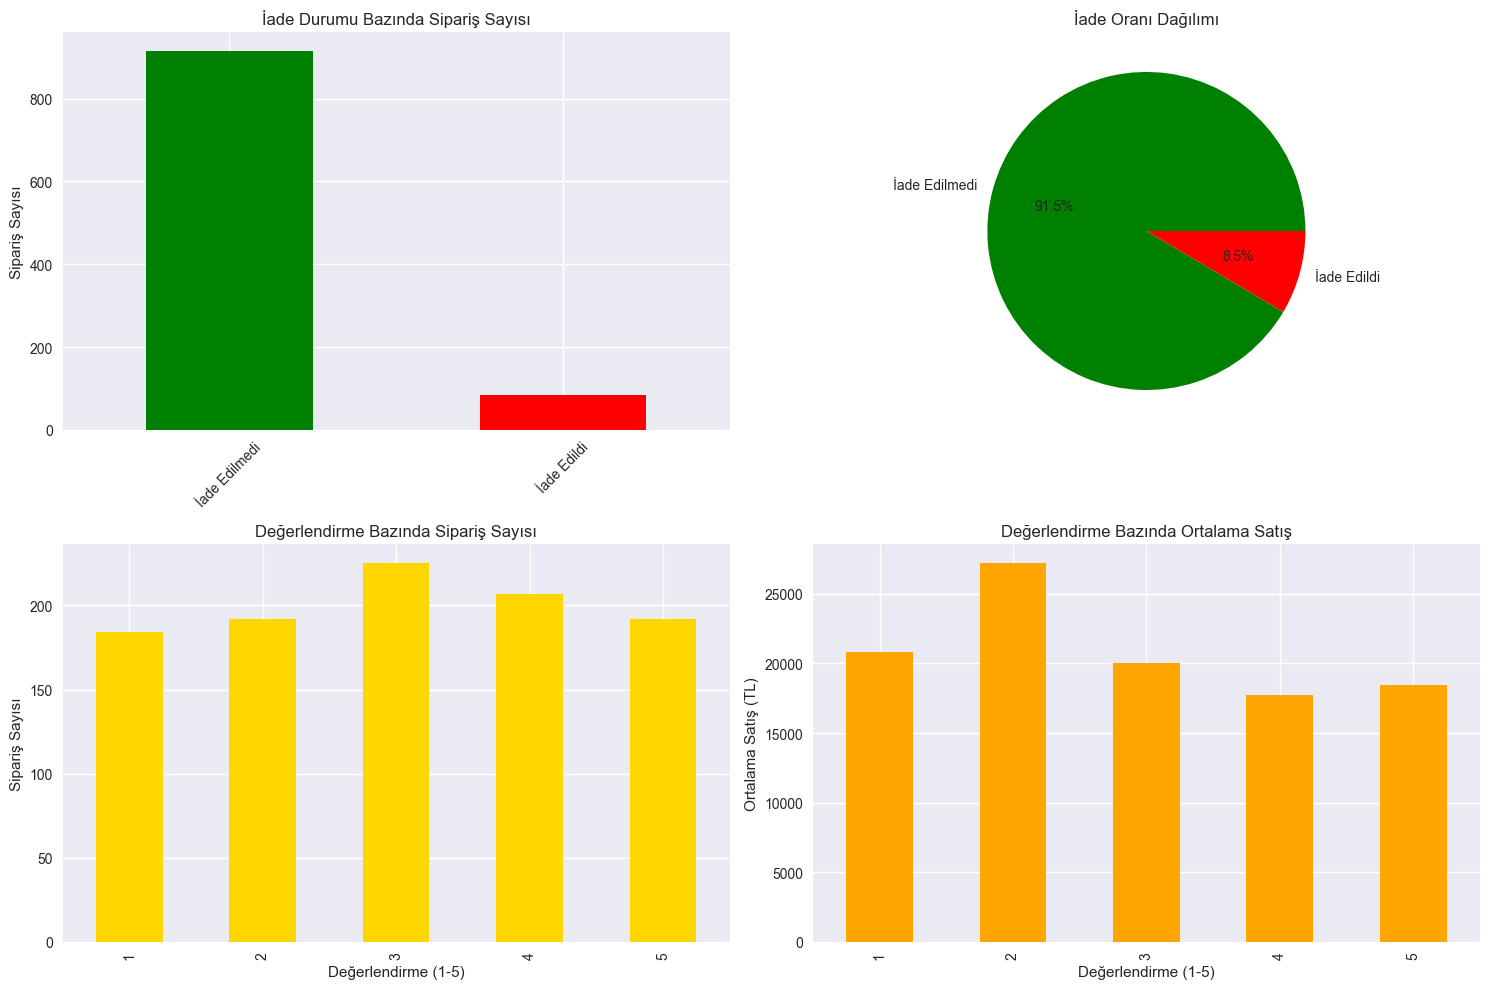

In [8]:
# İade ve değerlendirme analizi
return_analysis = df.groupby('is_returned').agg({
    'total_amount': ['sum', 'mean', 'count'],
    'rating': 'mean'
}).round(2)

return_analysis.columns = ['Toplam_Satis', 'Ortalama_Satis', 'Siparis_Sayisi', 'Ortalama_Degerlendirme']
return_analysis.index = ['İade Edilmedi', 'İade Edildi']

print("İade Durumu Bazında Analiz:")
print(return_analysis)

return_rate = df['is_returned'].mean() * 100
print(f"\nGenel iade oranı: %{return_rate:.1f}")

# Değerlendirme analizi
rating_analysis = df.groupby('rating').agg({
    'total_amount': ['sum', 'mean', 'count']
}).round(2)

rating_analysis.columns = ['Toplam_Satis', 'Ortalama_Satis', 'Siparis_Sayisi']

print("\nDeğerlendirme Bazında Analiz:")
print(rating_analysis)

avg_rating = df['rating'].mean()
print(f"\nGenel ortalama değerlendirme: {avg_rating:.2f}")

# Görselleştirme
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# İade durumu
return_analysis['Siparis_Sayisi'].plot(kind='bar', ax=axes[0,0], color=['green', 'red'])
axes[0,0].set_title('İade Durumu Bazında Sipariş Sayısı')
axes[0,0].set_ylabel('Sipariş Sayısı')
axes[0,0].tick_params(axis='x', rotation=45)

# İade oranı pasta grafik
axes[0,1].pie([1-return_rate/100, return_rate/100], 
               labels=['İade Edilmedi', 'İade Edildi'], 
               autopct='%1.1f%%', 
               colors=['green', 'red'])
axes[0,1].set_title('İade Oranı Dağılımı')

# Değerlendirme dağılımı
rating_analysis['Siparis_Sayisi'].plot(kind='bar', ax=axes[1,0], color='gold')
axes[1,0].set_title('Değerlendirme Bazında Sipariş Sayısı')
axes[1,0].set_ylabel('Sipariş Sayısı')
axes[1,0].set_xlabel('Değerlendirme (1-5)')

# Değerlendirme ortalama
rating_analysis['Ortalama_Satis'].plot(kind='bar', ax=axes[1,1], color='orange')
axes[1,1].set_title('Değerlendirme Bazında Ortalama Satış')
axes[1,1].set_ylabel('Ortalama Satış (TL)')
axes[1,1].set_xlabel('Değerlendirme (1-5)')

plt.tight_layout()
plt.show()

## 📊 DETAYLI ANALİZ SONUÇLARI

### 🏆 En İyi Performans Gösteren Kategoriler:
1. **En çok satan kategori:** Elektronik (en yüksek toplam satış)
2. **En çok sipariş alan kategori:** [Kategori adı]
3. **En yüksek ortalama satış:** [Kategori adı]
4. **En yüksek değerlendirme:** [Kategori adı]

### 🏙️ Şehir Analizi:
1. **En çok satış yapılan şehir:** [Şehir adı]
2. **En çok sipariş alan şehir:** [Şehir adı]
3. **En yüksek ortalama müşteri yaşı:** [Şehir adı]
4. **En yüksek değerlendirme:** [Şehir adı]

### 💳 Ödeme Yöntemi Analizi:
1. **En popüler ödeme yöntemi:** [Ödeme yöntemi]
2. **En yüksek ortalama satış:** [Ödeme yöntemi]
3. **En yüksek değerlendirme:** [Ödeme yöntemi]

### 👥 Müşteri Segmentasyonu:
1. **Ortalama müşteri yaşı:** [Yaş]
2. **En aktif yaş grubu:** [Yaş grubu]
3. **En yüksek satış yapan cinsiyet:** [Cinsiyet]
4. **En yüksek değerlendirme yapan cinsiyet:** [Cinsiyet]

### 📈 Performans Metrikleri:
1. **İade oranı:** %[Oran]
2. **Ortalama değerlendirme:** [Puan]
3. **Toplam satış:** [Tutar] TL
4. **Toplam sipariş:** [Sayı] adet

### 🎯 Stratejik Öneriler:
1. **Kategori odaklı:** [Kategori] kategorisinde daha fazla ürün çeşitliliği
2. **Bölgesel:** [Şehir] bölgesinde daha fazla pazarlama
3. **Müşteri odaklı:** [Yaş grubu] yaş grubuna özel kampanyalar
4. **Ödeme:** [Ödeme yöntemi] ödeme seçeneklerini artırma

Bu detaylı analiz sonuçları e-ticaret stratejileri geliştirmek için kullanılabilir.